In [2]:
import pandas as pd

# Read the CSV into a DataFrame
usd_jpy_df = pd.read_csv('USDJPY_D1.csv', sep='\t')

# Reset the index to move 'Time' into a column
usd_jpy_df.reset_index(inplace=True)

# Extract the first 10 characters from the 'index' column
usd_jpy_df['index'] = usd_jpy_df['index'].astype(str).str.slice(0, 10)

# Rename the columns
usd_jpy_df.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'spread']

usd_jpy_df['date'] = pd.to_datetime(usd_jpy_df['date'])

print(usd_jpy_df.info())
usd_jpy_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5020 non-null   datetime64[ns]
 1   open    5020 non-null   float64       
 2   high    5020 non-null   float64       
 3   low     5020 non-null   float64       
 4   close   5020 non-null   float64       
 5   volume  5020 non-null   int64         
 6   spread  5020 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 274.7 KB
None


,date,open,high,low,close,volume,spread
0,2008-10-17,101.550,101.790,100.600,101.655,12491395,14
1,2008-10-19,101.590,101.700,101.400,101.490,285361,84
2,2008-10-20,101.490,102.410,101.350,102.115,11347174,17
3,2008-10-21,102.120,102.155,100.050,100.225,15796358,18
4,2008-10-22,100.225,100.435,97.225,97.735,15914004,17
...,...,...,...,...,...,...,...
5015,2024-11-07,154.307,154.708,152.689,153.172,750704,10
5016,2024-11-08,153.173,153.366,152.139,152.608,657329,8
5017,2024-11-10,152.631,152.946,152.602,152.907,10136,137
5018,2024-11-11,152.910,153.952,152.870,153.521,460709,7


In [10]:
import pandas as pd

# Read the CSV into a DataFrame
usd_jpy_df = pd.read_csv('USDJPY60.csv', sep='\t', header=None)

# Set new column names
usd_jpy_df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']

usd_jpy_df['date'] = pd.to_datetime(usd_jpy_df['date'])

print(usd_jpy_df.info())
usd_jpy_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100011 entries, 0 to 100010
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    100011 non-null  datetime64[ns]
 1   open    100011 non-null  float64       
 2   high    100011 non-null  float64       
 3   low     100011 non-null  float64       
 4   close   100011 non-null  float64       
 5   volume  100011 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 4.6 MB
None


,date,open,high,low,close,volume
0,2008-10-17 08:00:00,101.110,101.280,101.070,101.130,378004
1,2008-10-17 09:00:00,101.130,101.230,100.600,100.625,670206
2,2008-10-17 10:00:00,100.625,100.910,100.610,100.765,676469
3,2008-10-17 11:00:00,100.765,101.180,100.685,101.165,903607
4,2008-10-17 12:00:00,101.165,101.260,100.755,100.950,1062385
...,...,...,...,...,...,...
100006,2024-11-12 01:00:00,153.767,153.964,153.740,153.961,27918
100007,2024-11-12 02:00:00,153.957,154.061,153.738,153.807,25333
100008,2024-11-12 03:00:00,153.812,153.815,153.576,153.654,20856
100009,2024-11-12 04:00:00,153.654,153.654,153.483,153.500,21395


#### Data Checking

In [ ]:
# Calculate the time difference between consecutive rows
time_diff = usd_jpy_df['date'].diff()

# Check if all differences are exactly 1 minute (60 seconds)
one_minute_diff = time_diff == pd.Timedelta(minutes=60)

# Print rows where the difference is not 1 minute (if any)
missing_intervals = usd_jpy_df[~one_minute_diff]
print("Rows with time differences other than specified:")
print(missing_intervals)

Rows with time differences other than 1 minute:
                     date     open     high      low    close  volume
0     2008-10-17 08:00:00  101.110  101.280  101.070  101.130  378004
13    2008-10-19 21:00:00  101.590  101.700  101.560  101.600   19990
133   2008-10-26 21:00:00   93.335   93.390   92.175   92.605   48382
253   2008-11-02 22:00:00   98.615   98.620   98.250   98.250    1416
373   2008-11-09 22:00:00   99.135   99.205   98.630   98.965    3544
...                   ...      ...      ...      ...      ...     ...
99499 2024-10-13 21:00:00  149.029  149.186  148.987  149.102    2092
99619 2024-10-20 21:00:00  149.439  149.551  149.412  149.515    1426
99739 2024-10-27 21:00:00  153.176  153.188  152.652  152.905    1611
99859 2024-11-03 22:00:00  152.260  152.551  152.258  152.426    2322
99979 2024-11-10 22:00:00  152.631  152.764  152.602  152.641    2208

[864 rows x 6 columns]


In [12]:
# Check for NaN values in the entire DataFrame
nan_check = usd_jpy_df.isna().sum()

# Print the result
print("Number of NaN values in each column:")
print(nan_check)

# Alternatively, if you just want to know if there are any NaN values at all
has_nan = usd_jpy_df.isna().any().any()
print("Does the DataFrame have any NaN values?", has_nan)

Number of NaN values in each column:
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64
Does the DataFrame have any NaN values? False


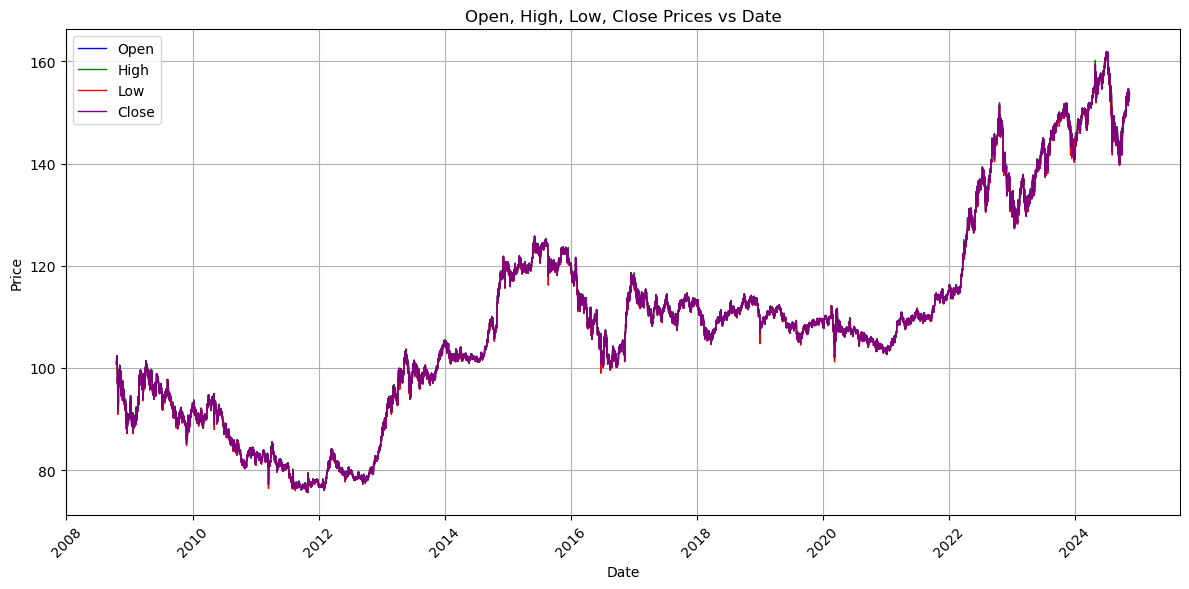

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'date' column is in datetime format
usd_jpy_df['date'] = pd.to_datetime(usd_jpy_df['date'])

# Convert relevant columns to numpy arrays
dates = np.array(usd_jpy_df['date'])
open_prices = np.array(usd_jpy_df['open'])
high_prices = np.array(usd_jpy_df['high'])
low_prices = np.array(usd_jpy_df['low'])
close_prices = np.array(usd_jpy_df['close'])

# Plot 'open', 'high', 'low', and 'close' vs 'date'
plt.figure(figsize=(12, 6))

# Plot open, high, low, close prices
plt.plot(dates, open_prices, label='Open', color='blue', linestyle='-', linewidth=1)
plt.plot(dates, high_prices, label='High', color='green', linestyle='-', linewidth=1)
plt.plot(dates, low_prices, label='Low', color='red', linestyle='-', linewidth=1)
plt.plot(dates, close_prices, label='Close', color='purple', linestyle='-', linewidth=1)

# Title and labels
plt.title('Open, High, Low, Close Prices vs Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

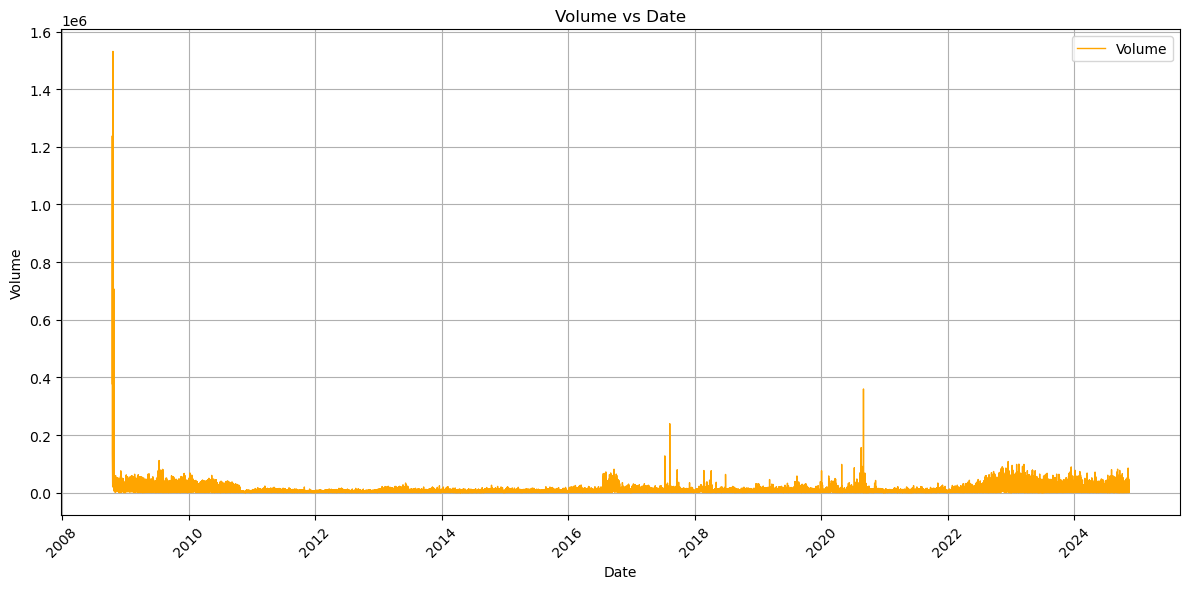

In [14]:
# Convert 'volume' column to numpy array
volume = np.array(usd_jpy_df['volume'])

# Plot 'volume' vs 'date'
plt.figure(figsize=(12, 6))

# Plot volume
plt.plot(dates, volume, label='Volume', color='orange', linestyle='-', linewidth=1)

# Title and labels
plt.title('Volume vs Date')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Features Engineering

In [15]:
usd_jpy_df

,date,open,high,low,close,volume
0,2008-10-17 08:00:00,101.110,101.280,101.070,101.130,378004
1,2008-10-17 09:00:00,101.130,101.230,100.600,100.625,670206
2,2008-10-17 10:00:00,100.625,100.910,100.610,100.765,676469
3,2008-10-17 11:00:00,100.765,101.180,100.685,101.165,903607
4,2008-10-17 12:00:00,101.165,101.260,100.755,100.950,1062385
...,...,...,...,...,...,...
100006,2024-11-12 01:00:00,153.767,153.964,153.740,153.961,27918
100007,2024-11-12 02:00:00,153.957,154.061,153.738,153.807,25333
100008,2024-11-12 03:00:00,153.812,153.815,153.576,153.654,20856
100009,2024-11-12 04:00:00,153.654,153.654,153.483,153.500,21395


In [19]:
import pandas as pd

df = usd_jpy_df.copy()

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Time Gap (in minutes) - Difference between consecutive timestamps
df['time_gap'] = (df['date'].shift(-1) - df['date']).dt.total_seconds() / 60

# Next Close
df['next_close'] = df['close'].shift(-1)

# Previous OHLC
df['prev_open'] = df['open'].shift(1)
df['prev_high'] = df['high'].shift(1)
df['prev_low'] = df['low'].shift(1)
df['prev_close'] = df['close'].shift(1)

# OHLC Change and Percentage Change
df['open_change'] = df['open'] - df['prev_open']
df['high_change'] = df['high'] - df['prev_high']
df['low_change'] = df['low'] - df['prev_low']
df['close_change'] = df['close'] - df['prev_close']

df['open_change_pct'] = (df['open_change'] / df['prev_open']) * 100
df['high_change_pct'] = (df['high_change'] / df['prev_high']) * 100
df['low_change_pct'] = (df['low_change'] / df['prev_low']) * 100
df['close_change_pct'] = (df['close_change'] / df['prev_close']) * 100

# Moving Averages (5, 10, 15 periods)
df['ma_close_5'] = df['close'].rolling(window=5).mean()
df['ma_close_10'] = df['close'].rolling(window=10).mean()
df['ma_close_15'] = df['close'].rolling(window=15).mean()

# Close MA Ratio
df['close_ma_5_ratio'] = df['close'] / df['ma_close_5']
df['close_ma_10_ratio'] = df['close'] / df['ma_close_10']
df['close_ma_15_ratio'] = df['close'] / df['ma_close_15']

# Range Features
df['range'] = df['high'] - df['low']
df['prev_range'] = df['prev_high'] - df['prev_low']
df['range_change'] = df['range'] - df['prev_range']

# Volatility Features (rolling standard deviation of 'close')
df['volatility'] = df['close'].rolling(window=5).std()
df['prev_volatility'] = df['volatility'].shift(1)
df['volatility_change'] = df['volatility'] - df['prev_volatility']

# Volume Features
df['prev_vol'] = df['volume'].shift(1)
df['vol_change'] = df['volume'] - df['prev_vol']

# Volume Moving Averages (5 and 10 periods)
df['vol_avg_5'] = df['volume'].rolling(window=5).mean()
df['vol_avg_10'] = df['volume'].rolling(window=10).mean()

# Volume Average Change (5 and 10 periods)
df['vol_avg_5_change'] = df['vol_avg_5'] - df['vol_avg_5'].shift(1)
df['vol_avg_10_change'] = df['vol_avg_10'] - df['vol_avg_10'].shift(1)

df['vol_avg_5_change_pct'] = (df['vol_avg_5_change'] / df['vol_avg_5'].shift(1)) * 100
df['vol_avg_10_change_pct'] = (df['vol_avg_10_change'] / df['vol_avg_10'].shift(1)) * 100

# Volume Difference (5 and 10 periods)
df['vol_diff_5'] = df['volume'] - df['vol_avg_5']
df['vol_diff_10'] = df['volume'] - df['vol_avg_10']

# Calculate rolling sums for 'time_gap' over different window sizes
df['time_gap_5_rolling_sum'] = df['time_gap'].rolling(window=5).sum()
df['time_gap_10_rolling_sum'] = df['time_gap'].rolling(window=10).sum()
df['time_gap_15_rolling_sum'] = df['time_gap'].rolling(window=15).sum()

df = df.iloc[15:].reset_index(drop=True)

df = df[df['date'] >= '2009']

df

,date,open,high,low,close,volume,time_gap,next_close,prev_open,prev_high,...,vol_avg_10,vol_avg_5_change,vol_avg_10_change,vol_avg_5_change_pct,vol_avg_10_change_pct,vol_diff_5,vol_diff_10,time_gap_5_rolling_sum,time_gap_10_rolling_sum,time_gap_15_rolling_sum
1244,2009-01-01 22:00:00,90.720,90.905,90.595,90.875,2872,60.0,90.640,90.925,90.925,...,10093.7,-2482.6,-1041.4,-26.895326,-9.352408,-3876.0,-7221.7,1800.0,2100.0,2400.0
1245,2009-01-01 23:00:00,90.880,90.880,90.640,90.640,1404,60.0,90.740,90.720,90.905,...,8805.7,-1978.6,-1288.0,-29.321280,-12.760435,-3365.4,-7401.7,1800.0,2100.0,2400.0
1246,2009-01-02 00:00:00,90.640,90.800,90.640,90.740,2616,60.0,90.810,90.880,90.880,...,7562.7,-1579.0,-1243.0,-33.106890,-14.115857,-574.4,-4946.7,1800.0,2100.0,2400.0
1247,2009-01-02 01:00:00,90.740,90.825,90.695,90.810,2694,60.0,90.875,90.640,90.800,...,6881.9,-1272.8,-680.8,-39.894684,-9.002076,776.4,-4187.9,1800.0,2100.0,2400.0
1248,2009-01-02 02:00:00,90.825,90.900,90.680,90.875,6320,60.0,91.025,90.740,90.825,...,6205.9,1263.6,-676.0,65.894869,-9.822869,3138.8,114.1,300.0,2100.0,2400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,2024-11-12 01:00:00,153.767,153.964,153.740,153.961,27918,60.0,153.807,153.520,153.811,...,14742.1,2352.0,115.4,20.943900,0.788968,14336.0,13175.9,300.0,600.0,900.0
99992,2024-11-12 02:00:00,153.957,154.061,153.738,153.807,25333,60.0,153.654,153.767,153.964,...,15456.0,4099.2,713.9,30.181122,4.842594,7651.8,9877.0,300.0,600.0,900.0
99993,2024-11-12 03:00:00,153.812,153.815,153.576,153.654,20856,60.0,153.500,153.957,154.061,...,15919.3,3962.4,463.3,22.410244,2.997541,-787.6,4936.7,300.0,600.0,900.0
99994,2024-11-12 04:00:00,153.654,153.654,153.483,153.500,21395,60.0,153.611,153.812,153.815,...,16566.4,2763.6,647.1,12.768671,4.064877,-3012.2,4828.6,300.0,600.0,900.0


In [20]:
# Count of NaN values in the entire DataFrame
nan_count = df.isna().sum().sum()

# Count of Inf values (both positive and negative) in the entire DataFrame
inf_count = ((df == float('inf')) | (df == float('-inf'))).sum().sum()

# Display the counts
print("Total NaN values:", nan_count)
print("Total Inf values:", inf_count)

Total NaN values: 5
Total Inf values: 0


# Model Selection

## Linear Regression

In [ ]:
import time
import numpy as np
from sklearn.linear_model import LinearRegression

# Separate df into features and target
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Specify parameters for the sliding window approach
num_predictions = 1   # Number of rows to predict
gap = 1               # Gap (number of rows to skip after each window)
max_windows = 50      # Maximum number of windows to process
set_limit = False     # Set this to False to process all windows

# Define list of window sizes
# window_sizes = list(range(20000, 199984 , 20000))
window_sizes = [1000]

# List to store results
results = []

# Loop through each window size
for window_size in window_sizes:

    # Initiate lists to store RMSEs and percentages
    all_val_rmse = []
    all_val_rmse_perc = []
    all_train_rmse = []
    all_train_rmse_perc = []
    total_window_times = 0  # Variable to store total time for all windows

    # Calculate the number of windows based on dataset size
    num_windows = len(X) - window_size - num_predictions

    # Apply maximum window limit if set
    if set_limit:
        num_windows = min(num_windows, max_windows)

    # Loop through each sliding window with the gap applied
    window_number = 0
    while window_number < num_windows:
        start = window_number
        end = start + window_size
        X_train = X[start:end]
        y_train = y[start:end]

        # Prepare validation data for prediction
        X_val = X[end:end + num_predictions]
        y_val = y[end:end + num_predictions]

        # Track the start time of the window processing
        start_time = time.time()

        # Initialize and fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on validation data
        y_pred_val = model.predict(X_val)
        # Predict on training data
        y_pred_train = model.predict(X_train)

        # Calculate RMSE and RMSE percentage for validation
        mse_val = np.mean((y_val - y_pred_val) ** 2)
        rmse_val = np.sqrt(mse_val)
        rmse_val_perc = (rmse_val / y_val)[0] * 100  # Convert to percentage

        # Calculate RMSE for training
        mse_train = np.mean((y_train - y_pred_train) ** 2)
        rmse_train = np.sqrt(mse_train)
        rmse_train_perc = (rmse_train / y_train).mean() * 100  # Convert to percentage

        # Track the end time of the window processing
        end_time = time.time()

        # Calculate the time taken for this window
        window_time = end_time - start_time
        total_window_times += window_time  # Add the window time to the total time

        # Append RMSEs and percentage errors
        all_val_rmse.append(rmse_val)
        all_val_rmse_perc.append(rmse_val_perc)
        all_train_rmse.append(rmse_train)
        all_train_rmse_perc.append(rmse_train_perc)

        # Move to the next window based on the gap
        window_number += gap

    # Calculate average, max, min, and variance for validation and training RMSEs, percentages
    avg_val_rmse = np.mean(all_val_rmse)
    var_val_rmse = np.var(all_val_rmse)

    avg_val_rmse_perc = np.mean(all_val_rmse_perc)
    var_val_rmse_perc = np.var(all_val_rmse_perc)

    avg_train_rmse = np.mean(all_train_rmse)
    var_train_rmse = np.var(all_train_rmse)

    avg_train_rmse_perc = np.mean(all_train_rmse_perc)
    var_train_rmse_perc = np.var(all_train_rmse_perc)

    # Append results to the list
    results.append({
        'window_size': window_size,
        'avg_val_rmse': avg_val_rmse,
        'var_val_rmse': var_val_rmse,
        'avg_val_rmse_perc': avg_val_rmse_perc,
        'var_val_rmse_perc': var_val_rmse_perc,
        'avg_train_rmse': avg_train_rmse,
        'var_train_rmse': var_train_rmse,
        'avg_train_rmse_perc': avg_train_rmse_perc,
        'var_train_rmse_perc': var_train_rmse_perc,
        'window_time': total_window_times  # Total time for all windows
    })

    # Print results for the current window size
    print(f'Window size {window_size} | Time Elapsed: {total_window_times:.3f} seconds')
    print(f'Average Training RMSE: {avg_train_rmse:.4f}, Training Variance RMSE: {var_train_rmse:.4f}')
    print(f'Average Validation RMSE: {avg_val_rmse:.4f}, Validation Variance RMSE: {var_val_rmse:.4f}')

# Convert results to a DataFrame
results_summary = pd.DataFrame(results)

# Print the resulting DataFrame
print("\nSummary of RMSE Results for Each Window Size:")
print(results_summary)

In [ ]:
import matplotlib.pyplot as plt

# Ensure you have results_summary populated before running this code
if not results_summary.empty:
    # Plotting RMSE and Variance
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # RMSE Plot
    color = 'tab:red'
    ax1.set_xlabel('Window Size')
    ax1.set_ylabel('RMSE (IDR)', color=color)

    # Plot average RMSE as lines without points
    ax1.plot(results_summary['window_size'].values, results_summary['avg_train_rmse'].values, 
              label='Avg Train RMSE', color='red', linewidth=2)
    ax1.plot(results_summary['window_size'].values, results_summary['avg_val_rmse'].values, 
              label='Avg Val RMSE', color='orange', linewidth=2)

    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Create a second y-axis for variance
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Variance of RMSE', color=color)  # Set the label for the second Y axis

    # Plot variance of RMSE as lines without points
    ax2.plot(results_summary['window_size'].values, results_summary['var_train_rmse'].values, 
             label='Var Train RMSE', color='green', linestyle='--', linewidth=2)
    ax2.plot(results_summary['window_size'].values, results_summary['var_val_rmse'].values, 
             label='Var Val RMSE', color='blue', linestyle='--', linewidth=2)

    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('RMSE and Variance vs. Window Size')
    plt.grid()
    plt.show()
else:
    print("Results summary is empty.")

# Comparing With Bloomberg

In [7]:
# Read the CSV into a DataFrame with the first row as the header
usd_jpy_bloomberg = pd.read_csv('usd_jpy_data.csv', header=1)

usd_jpy_bloomberg = usd_jpy_bloomberg.iloc[:, :5]

# Rename the columns
usd_jpy_bloomberg.columns = ['date', 'open', 'high', 'low', 'close']

usd_jpy_bloomberg

,date,open,high,low,close
0,2011-01-03,81.34,81.75,80.93,81.74
1,2011-01-04,81.74,82.28,81.61,82.04
2,2011-01-05,82.04,83.38,81.89,83.25
3,2011-01-06,83.25,83.40,82.88,83.33
4,2011-01-07,83.33,83.68,82.86,83.15
...,...,...,...,...,...
3601,2024-10-22,150.84,151.20,150.50,151.08
3602,2024-10-23,151.08,153.19,151.03,152.76
3603,2024-10-24,152.76,152.83,151.55,151.83
3604,2024-10-25,151.83,152.38,151.46,152.31


In [11]:
filtered_usd_jpy_df = usd_jpy_df[(usd_jpy_df['date'] >= '2011-01-03') & (usd_jpy_df['date'] <= '2024-10-28')]

filtered_usd_jpy_df = filtered_usd_jpy_df[['date','open','high','low','close']]

# Display the filtered DataFrame
filtered_usd_jpy_df

,date,open,high,low,close
684,2011-01-03,81.125,81.748,81.125,81.667
685,2011-01-04,81.668,82.277,81.608,82.047
686,2011-01-05,82.047,83.374,81.879,83.183
687,2011-01-06,83.184,83.388,82.879,83.306
688,2011-01-07,83.301,83.674,82.850,83.135
...,...,...,...,...,...
5002,2024-10-23,151.152,153.185,151.135,152.769
5003,2024-10-24,152.767,152.792,151.552,151.789
5004,2024-10-25,151.792,152.378,151.452,152.244
5005,2024-10-27,153.176,153.221,152.652,152.955


In [13]:
# Convert 'date' columns to datetime format
usd_jpy_bloomberg['date'] = pd.to_datetime(usd_jpy_bloomberg['date'])
filtered_usd_jpy_df['date'] = pd.to_datetime(filtered_usd_jpy_df['date'])

# Merge the two DataFrames on the 'date' column using inner join
merged_df = pd.merge(usd_jpy_bloomberg, filtered_usd_jpy_df, on='date', how='inner', suffixes=('_bloomberg', '_filtered'))

# Calculate the absolute difference and absolute percentage difference
merged_df['open_abs_diff'] = abs(merged_df['open_bloomberg'] - merged_df['open_filtered'])
merged_df['high_abs_diff'] = abs(merged_df['high_bloomberg'] - merged_df['high_filtered'])
merged_df['low_abs_diff'] = abs(merged_df['low_bloomberg'] - merged_df['low_filtered'])
merged_df['close_abs_diff'] = abs(merged_df['close_bloomberg'] - merged_df['close_filtered'])

# Calculate the absolute percentage difference
merged_df['open_abs_pct_diff'] = (merged_df['open_abs_diff'] / merged_df['open_bloomberg']) * 100
merged_df['high_abs_pct_diff'] = (merged_df['high_abs_diff'] / merged_df['high_bloomberg']) * 100
merged_df['low_abs_pct_diff'] = (merged_df['low_abs_diff'] / merged_df['low_bloomberg']) * 100
merged_df['close_abs_pct_diff'] = (merged_df['close_abs_diff'] / merged_df['close_bloomberg']) * 100

# Display the comparison
merged_df[['date', 'open_abs_diff', 'high_abs_diff', 'low_abs_diff', 'close_abs_diff', 
           'open_abs_pct_diff', 'high_abs_pct_diff', 'low_abs_pct_diff', 'close_abs_pct_diff']]

,date,open_abs_diff,high_abs_diff,low_abs_diff,close_abs_diff,open_abs_pct_diff,high_abs_pct_diff,low_abs_pct_diff,close_abs_pct_diff
0,2011-01-03,0.215,0.002,0.195,0.073,0.264323,0.002446,0.240949,0.089308
1,2011-01-04,0.072,0.003,0.002,0.007,0.088084,0.003646,0.002451,0.008532
2,2011-01-05,0.007,0.006,0.011,0.067,0.008532,0.007196,0.013433,0.080480
3,2011-01-06,0.066,0.012,0.001,0.024,0.079279,0.014388,0.001207,0.028801
4,2011-01-07,0.029,0.006,0.010,0.015,0.034801,0.007170,0.012069,0.018040
...,...,...,...,...,...,...,...,...,...
3599,2024-10-22,0.220,0.006,0.006,0.073,0.145850,0.003968,0.003987,0.048319
3600,2024-10-23,0.072,0.005,0.105,0.009,0.047657,0.003264,0.069523,0.005892
3601,2024-10-24,0.007,0.038,0.002,0.041,0.004582,0.024864,0.001320,0.027004
3602,2024-10-25,0.038,0.002,0.008,0.066,0.025028,0.001313,0.005282,0.043333


In [15]:
# Calculate the min, max, and average for each column
summary_stats = merged_df[['open_abs_diff', 'high_abs_diff', 'low_abs_diff', 'close_abs_diff', 
                           'open_abs_pct_diff', 'high_abs_pct_diff', 'low_abs_pct_diff', 'close_abs_pct_diff']].agg(['min', 'max', 'mean'])

# Display the summary statistics
summary_stats

,open_abs_diff,high_abs_diff,low_abs_diff,close_abs_diff,open_abs_pct_diff,high_abs_pct_diff,low_abs_pct_diff,close_abs_pct_diff
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.620000,1.135000,3.974000,1.614000,1.328986,1.062336,3.998995,1.334497
mean,0.102425,0.026877,0.035007,0.080893,0.092631,0.024733,0.032366,0.072934
